In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import warnings
warnings.filterwarnings('ignore')

#Central Limit Theorem
* CLT states that for a large sample drawn from a population with mean $\mu$ and standard deviation $\sigma$, the sampling distribution of mean, follows an approximate normal distribution with mean, μ and standard error σ / √(n) irrespective of the distribution of the population for large sample size.

* As a general rule, statisticians have found that for any population distribution, when the sample size is at least 30 & above, the sampling distribution of the mean is approximately **normal.**


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

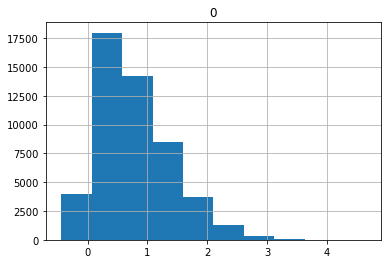

In [2]:
#Let us simulate the population (N=5000) of delivery time of food delivery company with the following specification
#Mean=60 min ,standard_deviation=20min
pop_skewed=skewnorm.rvs(7,size=50000)
pop_skewed_df=pd.DataFrame(pop_skewed)
pop_skewed_df.hist()

In [7]:
pop_skewed_df.skew()

0    0.906077
dtype: float64

In [25]:
import random
dtime=np.random.randn(5000)
dtime[:50]

array([-0.39543272,  0.02856669, -0.49359777, -0.12292297,  0.21653471,
       -0.45869689,  0.49339455, -0.29905773,  1.08431335,  2.04875819,
        0.67991579, -0.88387084, -0.05141271,  0.36357622, -0.43847339,
       -0.06886795, -1.25784609,  0.67384976,  1.58043222, -0.56777726,
       -0.60350349, -1.04470122, -0.27211555,  0.55491037, -1.21991384,
       -0.62979979,  0.82172777,  0.40880364,  0.41838561,  1.61815737,
        1.04441038, -1.21490041, -1.11965455,  0.12574523, -1.39915743,
       -1.25383568,  0.36430638,  0.87107486,  0.97939254, -0.45318494,
       -0.89735164, -0.90836747,  0.46296362, -1.82882981, -0.6014151 ,
        0.12313355, -0.79177815,  0.72756371,  0.01213541,  0.43454622])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5869fdf2b0>]],
      dtype=object)

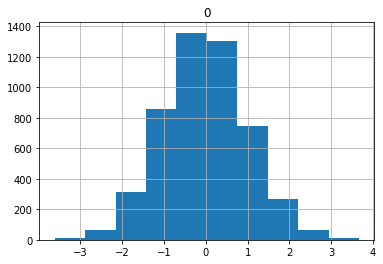

In [ ]:
dtime_df=pd.DataFrame(dtime)
dtime_df.hist()

In [26]:
#convert all 50,000 samples in time scale (pop_mean=709584)
pop=pop_skewed*40000+678000
pop[:100]

array([749137.12811536, 691626.59879427, 754723.72781419, 687438.6569944 ,
       731874.16261479, 687776.59951215, 684198.33008517, 678724.89928259,
       696353.87147768, 704619.43019409, 764638.83055503, 689618.99438769,
       697401.74093708, 699677.04609911, 704638.0287711 , 680930.49644295,
       716236.11626228, 694407.51870331, 673476.46695612, 713511.57009729,
       734672.60977538, 757476.28364956, 689366.09765653, 739525.48508047,
       692642.92856149, 687623.76791818, 785742.4013049 , 700214.24072098,
       729075.02460435, 709054.65448348, 700001.33501638, 684501.24818989,
       733226.70637699, 681044.47629105, 701755.65759032, 692200.29224257,
       701945.44888782, 736430.91181564, 710459.45070905, 694784.2630206 ,
       707606.7535224 , 670455.85405403, 729259.04074758, 689400.05837784,
       690428.05323686, 777777.36973378, 694107.65220073, 686268.62227001,
       740536.04644897, 687921.55177946, 706824.40836008, 709495.08167768,
       682165.67822083, 7

In [27]:
#True mean (pop)
np.mean(pop),np.std(pop,ddof=1)

(709701.666329538, 24515.679325867673)

In [28]:
from scipy.stats import ttest_1samp

In [31]:
np.mean(samp)

710021.2776104624

In [32]:
len(samp)

500

In [34]:
SEM

1073.369171993358

Ho: pop(mean) = 720000
Ha: Pop(mean) != 720000

In [35]:
ttest_1samp(samp,720000)

Ttest_1sampResult(statistic=-9.27679922704918, pvalue=5.293632917263714e-19)

since,p-val<5% (0.05) we reject H0, which implies our sample doesn't represent 720000

In [37]:
ttest_1samp(samp,711000)

Ttest_1sampResult(statistic=-0.9098771117510696, pvalue=0.36332659503768683)

* We need to estimate the true mean of the above population as close as possible
* Practically point estimate is impossible, we can do a closer prediction with range estimate with different confidence interval levels


In [10]:
#Method-1 (as per the theoretical definition of CLT)
trial=[]
for itr in np.arange(100):
  samp=[]
  for val in np.arange(500):
    samp.append(np.random.choice(pop))
  trial.append(np.mean(samp))

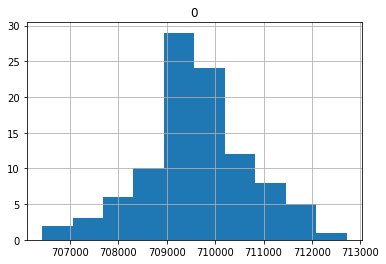

In [11]:
trial_df=pd.DataFrame(trial)
trial_df.hist()
plt.show()

In [12]:
trial_df.skew()

0   -0.088372
dtype: float64

In [13]:
np.mean(trial),np.std(trial,ddof=1)

(709647.2480975529, 1145.837467928753)

In [14]:
#95% CI
np.mean(trial)-1.96*np.std(trial,ddof=1)

707401.4066604126

In [15]:
np.mean(trial)+1.96*np.std(trial,ddof=1)

711893.0895346933

* The above standard deviation represents the STANDARD ERROR OF THE MEAN (SEM)
* 95% Confidence Interval Range [x_bar-1.96xSEM to x_bar+1.96xSEM]
* 99% Confidence Interval Range [x_bar-2.58xSEM to x_bar+2.58xSEM]

In [ ]:
print((1/100)/2) # 1% error is symmetrically splitted with 0.5% either side of the normal distribution
print((5/100)/2) # 5% error is symmetrically splitted with 2.5% either side of the normal distribution

0.005
0.025


In [ ]:
stats.norm.isf(0.005),stats.norm.isf(0.025)

(2.575829303548901, 1.9599639845400545)

In [ ]:
#95% Confidence Interval Range
[np.mean(trial)-1.96*np.std(trial,ddof=1),np.mean(trial)+1.96*np.std(trial,ddof=1)]

[57.62658944127126, 61.23190763824089]

* From the above range estimate of population mean,we can say that the true mean (59.34) lies in the above 95% confidence interval [57.62658944127126, 61.23190763824089]

In [ ]:
#Method-2 (More practical approximated approach)

In [3]:
samp=[]
for val in np.arange(500):
  samp.append(np.random.choice(pop))

NameError: name 'pop' is not defined

In [30]:
np.mean(samp)

710021.2776104624

* To match the theoretical approach of CLT,  SEM is calculated as follows: s / √(n)

In [18]:
SEM=np.std(samp,ddof=1)/np.sqrt(500)
SEM

1073.369171993358

In [19]:
#95% Confidence Interval Range
[np.mean(samp)-1.96*np.std(samp,ddof=1)/np.sqrt(500),np.mean(samp)+1.96*np.std(samp,ddof=1)/np.sqrt(500)]

[708141.0951804518, 712348.7023346658]

* From the above range estimate of population mean,we can say that the true mean (59.34) lies in the above 95% confidence interval [56.73968918180259, 60.12895600337146]

In [20]:
#90% Confidence Interval Range
[np.mean(samp)-1.64*np.std(samp,ddof=1)/np.sqrt(500),np.mean(samp)+1.64*np.std(samp,ddof=1)/np.sqrt(500)]

[708484.5733154897, 712005.2241996279]

In [21]:
#68% Confidence Interval Range
[np.mean(samp)-1*np.std(samp,ddof=1)/np.sqrt(500),np.mean(samp)+1*np.std(samp,ddof=1)/np.sqrt(500)]

[709171.5295855654, 711318.2679295521]

ONE SAMPLE t TEST
* Hypothesis is a claim made by a person / organization.

* The claim is usually about the population parameters such as mean or proportion and we seek evidence from a sample for the support of the claim.

* Hypothesis testing is a process used for either rejecting or retaining null hypothesis.

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
#Ho:mean_del=60min
#Ha:mean_del != 60min
ttest_1samp(samp,60) #Expected mean delivery time is 6omin

Ttest_1sampResult(statistic=28.027535271692038, pvalue=1.5930664416523687e-104)

In [ ]:
x_bar=np.mean(samp)
s=np.std(samp,ddof=1)
x_bar,s

(74.23044363906209, 11.353206415928028)

In [ ]:
sem=s/np.sqrt(500)
sem

0.5077308261720365

In [ ]:
len(samp)

500

In [ ]:
t_stat=(x_bar-60)/sem
t_stat

28.02753527169203

In [ ]:
ttest_1samp(samp,75) #Expected mean delivery time is 75min

Ttest_1sampResult(statistic=-1.5156778380778488, pvalue=0.13023401581188138)

since p-val >5% (0.05) we have enough evidence null hypothesis is TRUE (sample) is the representation of expected mean delivery time of 75min

In [ ]:
(32-30)/np.sqrt((15**2/200)+(10**2/500))

1.7374889710522776